In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import argparse

In [2]:
dfStarClassification = pd.read_csv("/Users/KDolp/Desktop/Физтех/Data Analysis/Lab2/Stars.csv",sep=",")
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['Blue White','Blue white','Blue-white'],'Blue-White')
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['yellow-white','White-Yellow'],'Yellowish White')
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['yellowish'],'Yellowish')
dfStarClassification['Color'] = dfStarClassification['Color'].replace(['Whitish','white'],'White')

In [3]:
dict_type = {'0':'Red Dwarf','1': 'Brown Dwarf','2': 'White Dwarf','3': 'Main Sequence','4': 'Supergiants','5': 'Hypergiants'}
dfStarClassification['Type'] = dfStarClassification['Type'].replace(dict_type.keys(),dict_type.values())

In [4]:
dfStarClassification_enc = pd.get_dummies(data=dfStarClassification.drop('Type',axis=1), columns=['Color','Spectral_Class'],drop_first= True)

In [5]:
dfStarClassification_enc.shape

(240, 18)

In [6]:
x = dfStarClassification_enc
y = pd.DataFrame(dfStarClassification['Type'],columns=['Type'])

In [13]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.3)

In [14]:
mm = MinMaxScaler()
xTrain_mm = pd.DataFrame(mm.fit_transform(xTrain),columns=['Temperature', 'L', 'R', 'A_M', 'Color_Blue-White', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_Yellowish', 'Color_Yellowish White',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O'])
xTest_mm = pd.DataFrame(mm.transform(xTest),columns=['Temperature', 'L', 'R', 'A_M', 'Color_Blue-White', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_Yellowish', 'Color_Yellowish White',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O'])

In [15]:
yTrain = pd.get_dummies(data=yTrain,columns =['Type'])
yTest = pd.get_dummies(data=yTest,columns =['Type'])

In [16]:
model_nn = keras.Sequential([keras.layers.Dense(700,kernel_initializer = 'he_uniform',input_shape=(18,),activation = 'relu'),
                            keras.layers.Dense(800,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(900,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(6,kernel_initializer = 'glorot_uniform',activation = 'softmax'),
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)

model_nn.compile(loss = "categorical_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain_mm,yTrain,validation_data = (xTest_mm,yTest),epochs = 40,callbacks = es)

Epoch 1/40
6/6 [==============================] - 1s 57ms/step - loss: 1.0426 - accuracy: 0.5833 - val_loss: 0.6272 - val_accuracy: 0.7778
Epoch 2/40
6/6 [==============================] - 0s 17ms/step - loss: 0.4853 - accuracy: 0.7440 - val_loss: 0.5594 - val_accuracy: 0.7083
Epoch 3/40
6/6 [==============================] - 0s 17ms/step - loss: 0.3789 - accuracy: 0.8214 - val_loss: 0.4720 - val_accuracy: 0.8472
Epoch 4/40
6/6 [==============================] - 0s 19ms/step - loss: 0.3806 - accuracy: 0.8512 - val_loss: 0.2733 - val_accuracy: 0.8194
Epoch 5/40
6/6 [==============================] - 0s 17ms/step - loss: 0.2136 - accuracy: 0.9226 - val_loss: 0.3708 - val_accuracy: 0.8333
Epoch 6/40
6/6 [==============================] - 0s 17ms/step - loss: 0.1369 - accuracy: 0.9583 - val_loss: 0.2007 - val_accuracy: 0.9306
Epoch 7/40
6/6 [==============================] - 0s 17ms/step - loss: 0.1213 - accuracy: 0.9286 - val_loss: 0.2962 - val_accuracy: 0.8472
Epoch 8/40
6/6 [===========

In [17]:
test_loss,test_acc= model_nn.evaluate(xTest_mm,yTest)
print("test_accuracy:",test_acc)

3/3 [==============================] - 0s 5ms/step - loss: 0.1380 - accuracy: 0.9306
test_accuracy: 0.9305555820465088


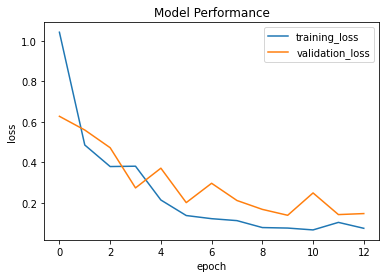

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()